# About the Dataset

    Condition Monitoring of Hydraulic Systems

**Abstract**:  
The dataset addresses the condition assessment of a hydraulic test rig based on multi-sensor data. Four fault types are superimposed with several severity grades, which makes selective quantification difficult.

**Source**:  
- **Creator**: ZeMA gGmbH, Eschberger Weg 46, 66121 Saarbrücken  
- **Contact**:  
  - t.schneider@zema.de  
  - s.klein@zema.de  
  - m.bastuck@lmt.uni-saarland.de  
  - info@lmt.uni-saarland.de  

**Data Type**:  
- **Type**: Multivariate, Time-Series  
- **Tasks**: Classification, Regression  
- **Attribute Type**: Categorical, Real  
- **Area**: Computer Science/Engineering  
- **Format**: Matrix  
- **Missing Values**: No

**Dataset Statistics**:  
- **Number of Instances**: 2205  
- **Number of Attributes**: 43,680  
  - 8 x 60 (1 Hz)  
  - 2 x 600 (10 Hz)  
  - 7 x 6000 (100 Hz)

    Relevant Information

The dataset was experimentally obtained from a hydraulic test rig. This rig consists of two circuits:  
1. **Primary working circuit**  
2. **Secondary cooling-filtration circuit**  

Both circuits are connected via an oil tank. The system repeats constant load cycles (duration 60 seconds) and measures process values such as pressures, volume flows, and temperatures. The condition of four hydraulic components is quantitatively varied:  
- Cooler  
- Valve  
- Pump  
- Accumulator  

    Attribute Information

The dataset contains raw sensor data structured as matrices (tab-delimited), with rows representing cycles and columns representing data points within a cycle. The target condition values are annotated in `profile.txt`. The rows correspond to cycle numbers, and the columns are defined as:

Sensor		Physical quantity		Unit		Sampling rate

PS1		Pressure			bar		100 Hz

PS2		Pressure			bar		100 Hz

PS3		Pressure			bar		100 Hz

PS4		Pressure			bar		100 Hz

PS5		Pressure			bar		100 Hz

PS6		Pressure			bar		100 Hz

EPS1		Motor power			W		100 Hz

FS1		Volume flow			l/min		10 Hz

FS2		Volume flow			l/min		10 Hz

TS1		Temperature			°C		1 Hz

TS2		Temperature			°C		1 Hz

TS3		Temperature			°C		1 Hz

TS4		Temperature			°C		1 Hz

VS1		Vibration			mm/s		1 Hz

CE		Cooling efficiency (virtual)	%		1 Hz

CP		Cooling power (virtual)		kW		1 Hz

SE		Efficiency factor		%		1 Hz

1. **Cooler condition (%)**:
   - 3: Close to total failure  
   - 20: Reduced efficiency  
   - 100: Full efficiency  

2. **Valve condition (%)**:
   - 100: Optimal switching behavior  
   - 90: Small lag  
   - 80: Severe lag  
   - 73: Close to total failure  

3. **Internal pump leakage**:
   - 0: No leakage  
   - 1: Weak leakage  
   - 2: Severe leakage  

4. **Hydraulic accumulator (bar)**:
   - 130: Optimal pressure  
   - 115: Slightly reduced pressure  
   - 100: Severely reduced pressure  
   - 90: Close to total failure  

5. **Stable flag**:
   - 0: Conditions were stable  
   - 1: Static conditions might not have been reached yet  

    Relevant Papers

1. Helwig, N., Pignanelli, E., Schütze, A., *Condition Monitoring of a Complex Hydraulic System Using Multivariate Statistics*, Proc. I2MTC-2015, IEEE International Instrumentation and Measurement Technology Conference, Pisa, Italy, May 11-14, 2015. [doi: 10.1109/I2MTC.2015.7151267](https://doi.org/10.1109/I2MTC.2015.7151267)
2. Helwig, N., Schütze, A., *Detecting and Compensating Sensor Faults in a Hydraulic Condition Monitoring System*, Proc. SENSOR 2015, 17th

In [3]:
import pandas as pd
import numpy as np

In [15]:
data_PS1 = pd.read_csv('./data/hydraulics_systems/PS1.txt',sep='\t', header=None)

In [17]:
data_PS1

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,151.16,151.19,151.25,151.16,151.10,151.16,151.14,151.10,151.21,151.19
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,150.82,150.82,150.86,150.80,150.73,150.79,150.84,150.79,150.80,150.86
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,150.49,150.44,150.47,150.46,150.38,150.47,150.50,150.43,150.54,150.62
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,150.34,150.30,150.28,150.38,150.41,150.33,150.31,150.31,150.25,150.28
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,150.31,150.20,150.17,150.28,150.31,150.25,150.27,150.22,150.13,150.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,151.70,151.83,151.90,151.75,151.62,151.63,153.78,154.73,153.83,154.43,...,151.84,151.75,151.67,151.76,151.81,151.78,151.78,151.83,151.84,151.86
2201,151.90,151.83,151.81,151.77,151.65,151.63,153.97,154.84,153.67,154.37,...,151.81,151.81,151.84,151.83,151.79,151.87,151.87,151.75,151.77,151.78
2202,151.73,151.78,151.84,151.62,151.46,151.49,153.91,154.88,153.69,154.24,...,151.73,151.66,151.73,151.71,151.68,151.79,151.84,151.73,151.73,151.83
2203,151.77,151.77,151.75,151.56,151.47,151.57,154.09,154.80,153.45,154.21,...,151.75,151.71,151.68,151.71,151.73,151.75,151.71,151.68,151.71,151.78


In [19]:
data_PS1.describe()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,148.978467,148.977220,148.966916,148.647410,147.968898,147.511646,149.992000,151.536866,150.853116,151.464689,...,148.976562,148.975782,148.976200,148.977447,148.976726,148.977306,148.978122,148.976844,148.976222,148.977125
std,3.684421,3.685462,3.685930,3.790893,4.023828,4.556763,4.280233,3.527235,3.419919,3.458501,...,3.686761,3.686337,3.688244,3.688526,3.684435,3.683719,3.688438,3.689265,3.682870,3.680577
min,144.920000,144.920000,144.560000,144.440000,141.190000,139.460000,142.770000,146.810000,146.440000,146.840000,...,144.460000,144.940000,144.840000,144.890000,144.940000,144.940000,144.880000,144.860000,144.940000,144.940000
25%,147.060000,147.100000,147.100000,146.180000,145.060000,144.770000,146.630000,149.840000,149.650000,150.310000,...,147.070000,147.070000,147.070000,147.080000,147.080000,147.090000,147.090000,147.070000,147.050000,147.060000
50%,148.560000,148.560000,148.560000,148.340000,148.130000,148.060000,150.560000,151.340000,150.520000,151.280000,...,148.580000,148.580000,148.560000,148.580000,148.560000,148.580000,148.560000,148.560000,148.560000,148.560000
75%,150.980000,150.980000,150.980000,150.870000,150.740000,150.710000,152.660000,153.320000,152.420000,153.160000,...,151.000000,150.980000,151.000000,151.000000,151.000000,150.980000,151.000000,150.980000,150.980000,150.980000
max,188.800000,188.880000,188.970000,188.840000,186.110000,187.000000,189.640000,187.880000,188.130000,188.280000,...,188.970000,189.070000,188.960000,188.880000,188.930000,188.910000,188.940000,188.950000,188.850000,188.880000


In [23]:
# work with mean for each cycle is needed
# lets do it for each sensor data file

In [37]:
import os

def process_files(directory, tag):
    output_data = []
    
    for filename in os.listdir(directory):
        if tag in filename and filename.endswith('.txt'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path, header=None, sep='\t')
            row_means = df.mean(axis=1)
            file_base = os.path.splitext(filename)[0]
            output_data.append((file_base, row_means))
    
    output_df = pd.DataFrame()
    for file, means in output_data:
        output_df[file] = means

    output_csv_path = os.path.join(directory, f'{tag}_mean.csv')
    output_df.to_csv(output_csv_path, index=False)

    print(f'Averages for each row in files with tag "{tag}" have been written to {output_csv_path}')

In [39]:
process_files('./data/hydraulics_systems/','PS')

Averages for each row in files with tag "PS" have been written to ./data/hydraulics_systems/PS_mean.csv


In [53]:
data_PS = pd.read_csv('./data/hydraulics_systems/PS_mean.csv')
data_PS.drop('EPS1',axis=1,inplace=True)
data_PS.head()

,PS1,PS2,PS3,PS4,PS5,PS6
0,160.673492,109.466914,1.991475,0.0,9.842170,9.728097
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949
3,160.188088,109.064807,1.946575,0.0,9.438827,9.337430
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636


In [55]:
process_files('./data/hydraulics_systems/','TS')

Averages for each row in files with tag "TS" have been written to ./data/hydraulics_systems/TS_mean.csv


In [57]:
data_TS = pd.read_csv('./data/hydraulics_systems/TS_mean.csv')
data_TS.head()

,TS1,TS2,TS3,TS4
0,35.621983,40.978767,38.471017,31.745250
1,36.676967,41.532767,38.978967,34.493867
2,37.880800,42.442450,39.631950,35.646150
3,38.879050,43.403983,40.403383,36.579467
4,39.803917,44.332750,41.310550,37.427900


In [59]:
process_files('./data/hydraulics_systems/','FS')
data_FS = pd.read_csv('./data/hydraulics_systems/FS_mean.csv')
data_FS.head()

Averages for each row in files with tag "FS" have been written to ./data/hydraulics_systems/FS_mean.csv


,FS1,FS2
0,6.709815,10.304592
1,6.715315,10.403098
2,6.718522,10.366250
3,6.720565,10.302678
4,6.690308,10.237750


In [184]:
process_files('./data/hydraulics_systems/','EPS')
data_EPS = pd.read_csv('./data/hydraulics_systems/EPS_mean.csv')
data_EPS.head()

Averages for each row in files with tag "EPS" have been written to ./data/hydraulics_systems/EPS_mean.csv


,EPS1
0,2538.929167
1,2531.498900
2,2519.928000
3,2511.541633
4,2503.449500


In [63]:
process_files('./data/hydraulics_systems/','VS')
data_VS = pd.read_csv('./data/hydraulics_systems/VS_mean.csv')
data_VS.head()

Averages for each row in files with tag "VS" have been written to ./data/hydraulics_systems/VS_mean.csv


,VS1
0,0.576950
1,0.565850
2,0.576533
3,0.569267
4,0.577367


In [65]:
process_files('./data/hydraulics_systems/','SE')
data_SE = pd.read_csv('./data/hydraulics_systems/SE_mean.csv')
data_SE.head()

Averages for each row in files with tag "SE" have been written to ./data/hydraulics_systems/SE_mean.csv


,SE
0,59.157183
1,59.335617
2,59.543150
3,59.794900
4,59.455267


In [71]:
process_files('./data/hydraulics_systems/','CP')
data_CP = pd.read_csv('./data/hydraulics_systems/CP_mean.csv')
data_CP.head()

Averages for each row in files with tag "CP" have been written to ./data/hydraulics_systems/CP_mean.csv


,CP
0,1.862750
1,1.255550
2,1.113217
3,1.062150
4,1.070467


In [73]:
process_files('./data/hydraulics_systems/','CE')
data_CE = pd.read_csv('./data/hydraulics_systems/CE_mean.csv')
data_CE.head()

Averages for each row in files with tag "CE" have been written to ./data/hydraulics_systems/CE_mean.csv


,CE
0,39.601350
1,25.786433
2,22.218233
3,20.459817
4,19.787017


In [81]:
data_profile = pd.read_csv('./data/hydraulics_systems/profile.txt',sep='\t', 
                           header=None)
data_profile.columns = ['Cooler condition','Valve condition',
                        'Internal pump leakage','Hydraulic accumulator / bar',
                        'Stable flag']
data_profile.head()

,Cooler condition,Valve condition,Internal pump leakage,Hydraulic accumulator / bar,Stable flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [178]:
import os
import pandas as pd

def combine_csv_files(directory, output_filename='final_data.csv'):
    dataframes = []

    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            dataframes.append(df)

    combined_df = dataframes[0]
    for df in dataframes[1:]:
        combined_df = pd.merge(combined_df, df, left_index=True, right_index=True, how='outer')

    output_path = os.path.join(directory, output_filename)
    combined_df.to_csv(output_path)

    print(f"All CSV files have been merged on index and saved to {output_path}")

In [180]:
combine_csv_files('./data/hydraulics_systems/')

All CSV files have been merged on index and saved to ./data/hydraulics_systems/final_data.csv


In [192]:
data_final = pd.read_csv('./data/hydraulics_systems/final_data.csv')
data_final.drop(['EPS1_y','Unnamed: 0'],axis=1,inplace=True)
data_final.rename(columns={'EPS1_x':'EPS1'},inplace=True)
data_final = pd.concat([data_final,data_profile],axis=1)
data_final.head()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,...,TS1,TS2,TS3,TS4,VS1,Cooler condition,Valve condition,Internal pump leakage,Hydraulic accumulator / bar,Stable flag
0,39.601350,1.862750,2538.929167,6.709815,10.304592,160.673492,109.466914,1.991475,0.0,9.842170,...,35.621983,40.978767,38.471017,31.745250,0.576950,3,100,0,130,1
1,25.786433,1.255550,2531.498900,6.715315,10.403098,160.603320,109.354890,1.976234,0.0,9.635142,...,36.676967,41.532767,38.978967,34.493867,0.565850,3,100,0,130,1
2,22.218233,1.113217,2519.928000,6.718522,10.366250,160.347720,109.158845,1.972224,0.0,9.530548,...,37.880800,42.442450,39.631950,35.646150,0.576533,3,100,0,130,1
3,20.459817,1.062150,2511.541633,6.720565,10.302678,160.188088,109.064807,1.946575,0.0,9.438827,...,38.879050,43.403983,40.403383,36.579467,0.569267,3,100,0,130,1
4,19.787017,1.070467,2503.449500,6.690308,10.237750,160.000472,108.931434,1.922707,0.0,9.358762,...,39.803917,44.332750,41.310550,37.427900,0.577367,3,100,0,130,1


In [194]:
data_final.describe()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,...,TS1,TS2,TS3,TS4,VS1,Cooler condition,Valve condition,Internal pump leakage,Hydraulic accumulator / bar,Stable flag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,31.299077,1.808399,2495.509203,6.198549,9.649453,160.485315,109.379906,1.753227,2.600266,9.163320,...,45.424567,50.365979,47.662121,40.735654,0.613315,41.240816,90.693878,0.669388,107.199546,0.342857
std,11.575330,0.278263,73.836682,1.032883,0.449246,4.699425,4.986585,0.251902,4.279355,0.576296,...,7.991933,7.396254,7.451888,8.107878,0.060260,42.383143,10.681802,0.817233,16.435848,0.474772
min,17.555983,1.062150,2361.747267,2.018572,8.857513,155.391547,104.406307,0.840252,0.000000,8.365800,...,35.313783,40.859400,38.245733,30.390800,0.524367,3.000000,73.000000,0.000000,90.000000,0.000000
25%,20.084650,1.550100,2442.933467,6.391670,9.203397,158.100195,106.962382,1.729733,0.000000,8.547239,...,36.237150,41.864183,39.123183,31.272567,0.555100,3.000000,80.000000,0.000000,90.000000,0.000000
50%,27.392533,1.739683,2480.926633,6.576673,9.692270,158.960895,107.730169,1.779631,0.000000,9.115781,...,44.836650,49.780583,47.070250,40.429050,0.610183,20.000000,100.000000,0.000000,100.000000,0.000000
75%,46.677383,2.148483,2548.211467,6.657508,10.155008,161.000735,109.421612,1.932047,3.503266,9.844351,...,54.104317,58.584467,55.694433,49.409500,0.649850,100.000000,100.000000,1.000000,130.000000,1.000000
max,47.903667,2.840100,2740.641000,6.722707,10.403098,180.922708,131.589089,2.023398,10.207068,9.978510,...,57.899283,61.958467,59.423167,53.060417,0.839067,100.000000,100.000000,2.000000,130.000000,1.000000


In [223]:
import seaborn as sns

In [254]:
def calculate_class_percentage(series):

    class_counts = series.value_counts()
    class_percentage = (class_counts / len(series)) * 100
    class_percentage_df = pd.DataFrame(class_percentage)
    
    return class_percentage_df
calculate_class_percentage(data_final['Cooler condition'])

,Cooler condition
100,33.605442
3,33.197279
20,33.197279


In [250]:
import matplotlib.pyplot as plt

def plot_countplots(df):
    num_columns = 2
    num_rows = (len(df.columns) + 1) // num_columns
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 3 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        sns.countplot(x=df[col], ax=axes[i],hue=df[col],palette='Set2',legend=False)
        axes[i].set_title(f'Countplot of {col}', fontsize=14)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

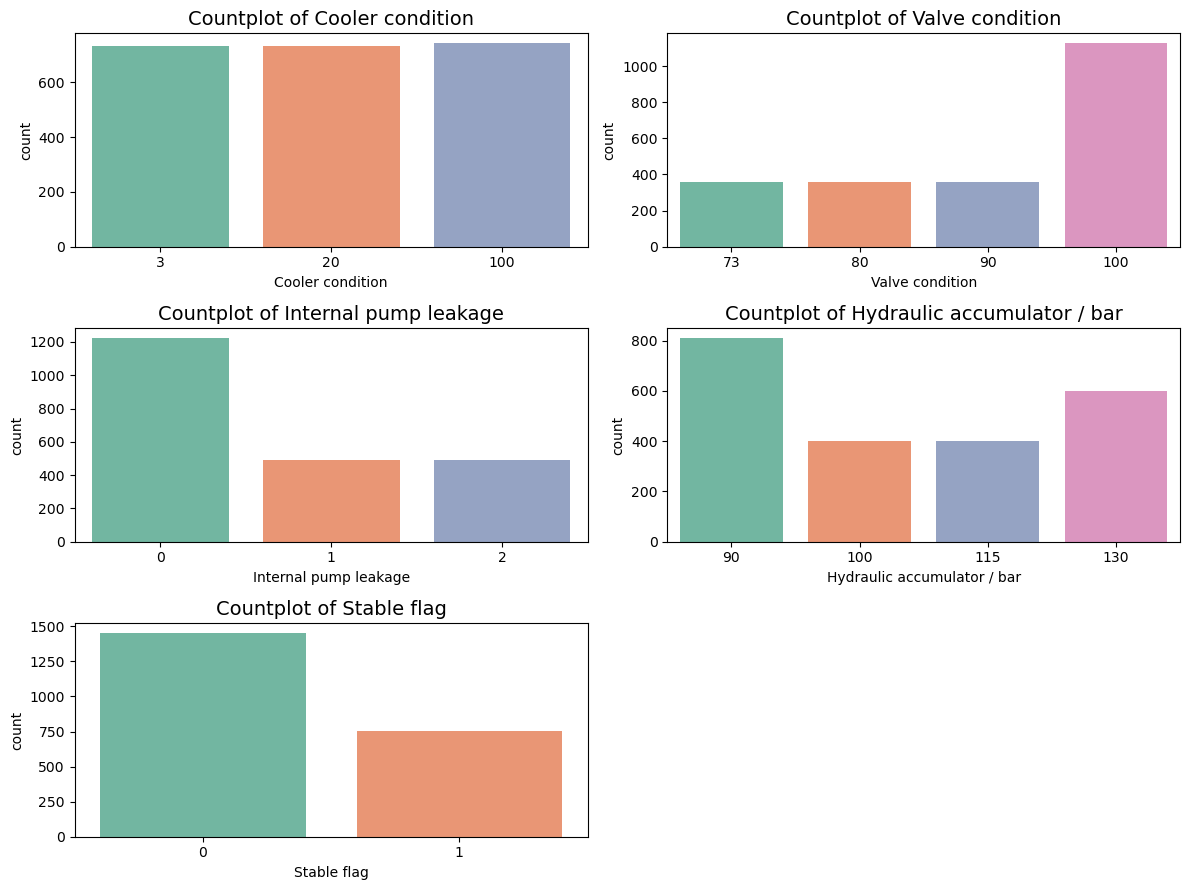

In [252]:
plot_countplots(data_final[['Cooler condition','Valve condition',
                            'Internal pump leakage',
                            'Hydraulic accumulator / bar',
                            'Stable flag']])

# Model

In [261]:
X = data_final.iloc[:,:-5]
y = data_final.iloc[:,-5:]

In [265]:
# lets predicts each condition type separately

In [403]:
y1 = pd.DataFrame(y.iloc[:,0])

In [405]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y1 = encoder.fit_transform(y1)

In [410]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y1, train_size=0.8,stratify=y1)

In [412]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [416]:
from sklearn.model_selection import cross_validate

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

def calculate_classification_metrics(model, X, y):
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    

    accuracy = results['test_accuracy'].mean()
    precision = results['test_precision_macro'].mean()
    recall = results['test_recall_macro'].mean()
    f1 = results['test_f1_macro'].mean()

    return accuracy, precision, recall, f1

In [418]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

accuracy, precision, recall, f1 = calculate_classification_metrics(model,X_train_scaled,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['Decision Tree'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [420]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=101)

accuracy, precision, recall, f1 = calculate_classification_metrics(model,X_train_scaled,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['Random Forest'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [422]:
from xgboost import XGBClassifier

model = XGBClassifier()
accuracy, precision, recall, f1 = calculate_classification_metrics(model,X_train_scaled,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['XGBoost'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [424]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.998867,0.998974,0.998691,0.998827
1,Random Forest,0.998867,0.998974,0.998691,0.998827
2,XGBoost,0.998867,0.998974,0.998691,0.998827


In [445]:
model_XGB = XGBClassifier()

In [447]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model_XGB, X_train_scaled, y_train, cv=5,scoring='accuracy')

In [451]:
model_XGB.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [456]:
predictions = model_XGB.predict(X_test_scaled)

In [464]:
from sklearn import metrics
from sklearn.metrics import classification_report

accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions,average='macro')
recall = metrics.recall_score(y_test, predictions,average='macro')
f1 = metrics.f1_score(y_test, predictions,average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       148

   micro avg       1.00      1.00      1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441
 samples avg       1.00      1.00      1.00       441

